# Basic Usage

In [1]:
import io
from collections import defaultdict

from pdfminer.layout import LAParams
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.pdfpage import PDFPage

In [2]:
# Create a PDF resource manager object that stores shared resources.
resource_manager = PDFResourceManager()
# PDF file path
path='Hemingway.pdf'

# Test Demo

In [3]:
page_result = defaultdict(str)
cnt = 0

with open(path, 'rb') as fh:
    for page in PDFPage.get_pages(fh,caching=True,check_extractable=True):
        cnt += 1
        if cnt<=14:
            continue
        fake_file_handle = io.StringIO()
        # Converter laparams: parameters for analysis.
        converter = TextConverter(resource_manager, fake_file_handle, laparams=LAParams())
        # Create a PDF interpreter object.
        page_interpreter = PDFPageInterpreter(resource_manager, converter)
        # Process page
        page_interpreter.process_page(page)
        temp_txt = fake_file_handle.getvalue()
#         fake_file_handle = io.StringIO()
        page_result[cnt] = temp_txt
        if cnt == 18:
            # close open handles
            converter.close()
            fake_file_handle.close()
            break
#     text = fake_file_handle.getvalue()
print('Finsish')

Finsish


#  the catalogue of the book

In [4]:
# Page 15 is the catalogue of the book
print(page_result[15])

Contents

Foreword by Charles Scribner, Jr.

Preface

1. What Writing is and Does

2. The Qualities of a Writer

3. The Pain and Pleasure of Writing

4. What to Write About

5. Advice to Writers

6. Working Habits

7. Characters

8. Knowing What to Leave Out

9. Obscenity

10. Titles

11. Other Writers

12. Politics

13. The Writer’s Life




In [5]:
contents = {
    1: "What Writing is and Does",
    2: "The Qualities of a Writer",
    3: "The Pain and Pleasure of Writing",
    4: "What to Write About",
    5: "Advice to Writers",
    6: "Working Habits",
    7: "Characters",
    8: "Knowing What to Leave Out",
    9: "Obscenity",
    10: "Titles",
    11: "Other Writers",
    12: "Politics",
    13: "The Writer's Life"
}

In [6]:
## I encapsulated this functionality into a function
## My Function  get contents from pages in [start_page,end_page]
def get_contents(pdf_path, start_page,end_page):
    content_result = defaultdict(str)
    cnt = 0
    resource_manager = PDFResourceManager()
    total_text = ""
    with open(path, 'rb') as fh:
        for page in PDFPage.get_pages(fh,caching=True,check_extractable=True):
            cnt += 1
            if cnt<start_page:
                continue
            fake_file_handle = io.StringIO()
            # Converter laparams: parameters for analysis.
            converter = TextConverter(resource_manager, fake_file_handle, laparams=LAParams())
            # Create a PDF interpreter object.
            page_interpreter = PDFPageInterpreter(resource_manager, converter)
            # Process page
            page_interpreter.process_page(page)
            temp_txt = fake_file_handle.getvalue()
            content_result[cnt] = temp_txt
            total_text += temp_txt
            if cnt == end_page:
                # close open handles
                converter.close()
                fake_file_handle.close()
                break
    content_result['total'] = total_text
    print('Finish analyzing the pdf file,pages:{0}-{1}'.format(start_page,end_page))
    return content_result

# Page range for each chapter.

In [7]:
ps1 = get_contents(path,26,28)
ps2 = get_contents(path,30,33)
ps3 = get_contents(path,35,39)
ps4 = get_contents(path,41,47)
ps5 = get_contents(path,49,59)
ps6 = get_contents(path,61,78)
ps7 = get_contents(path,80,87)
ps8 = get_contents(path,89,93)
ps9 = get_contents(path,95,99)
ps10 = get_contents(path,101,103)
ps11 = get_contents(path,105,118)
ps12 = get_contents(path,120,122)
ps13 = get_contents(path,124,145)

Finish analyzing the pdf file,pages:26-28
Finish analyzing the pdf file,pages:30-33
Finish analyzing the pdf file,pages:35-39
Finish analyzing the pdf file,pages:41-47
Finish analyzing the pdf file,pages:49-59
Finish analyzing the pdf file,pages:61-78
Finish analyzing the pdf file,pages:80-87
Finish analyzing the pdf file,pages:89-93
Finish analyzing the pdf file,pages:95-99
Finish analyzing the pdf file,pages:101-103
Finish analyzing the pdf file,pages:105-118
Finish analyzing the pdf file,pages:120-122
Finish analyzing the pdf file,pages:124-145


In [8]:
# Merge the text of each chapter
chapter_text = [ps1['total'],ps2['total'],ps3['total'],ps4['total'],ps5['total'],ps6['total'],
                ps7['total'],ps8['total'],ps9['total'],ps10['total'],ps11['total'],ps12['total'],ps13['total']]
book_text = '\n'.join(chapter_text)

In [9]:
# Number of characters in the book
len(book_text)

115196

# My Word Cloud

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import word_tokenize  

In [11]:
# Set some stop words
my_stop = stopwords.words('english')
my_stop += [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
my_stop += ['P.','p.','The','But','I','.','’','”','“','It',"Selected","Letters",'pp','c']

In [12]:
# Remove some stop words
wd = word_tokenize(book_text)
word_list = [word for word in wd if word not in my_stop]
text = ' '.join(word_list)

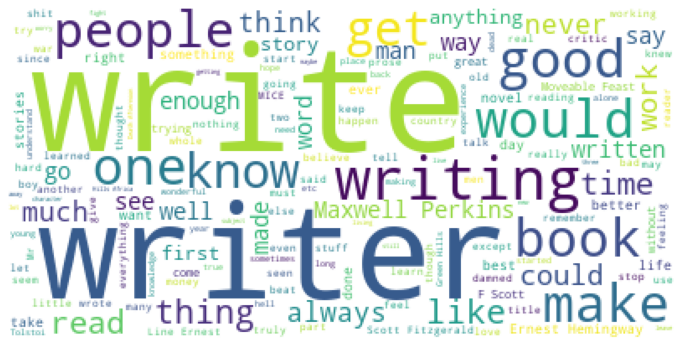

In [13]:
# word cloud
wc = WordCloud(
        stopwords=my_stop,
        background_color='white'
    ).generate(text)

# show the picture
plt.figure(figsize=(12,9.6))
plt.imshow(wc)
plt.axis('off')
plt.show()
# Save to local
wc.to_file('wordCloudPic.png')    